In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('merge.panss.fu.csv',index_col=0)

In [6]:
df.columns

Index(['subject_id', 'redcap_event_name', 'panss_total', 'panss_date',
       'longitudinal_2yr_fu_visit', 'studies_enrolled___10',
       'studies_enrolled___11', 'studies_enrolled___1', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2',
       'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13',
       'G14', 'G15', 'G16', 'screen_date', 'date_onset_psychotic_illness',
       'panss_time', 'panss_days', 'panss_month', 'panss_years', 'onset_time',
       'onset_days', 'onset_month', 'onset_years', 'panss_month_add_onset',
       'panss_years_add_onset', 'SAL', 'WD', 'COG', 'HOS', 'DST'],
      dtype='object')

In [8]:
df.head(1).values


array([['2-000020-08', 'visit_2_arm_1', 39, '8/25/16', nan, nan, nan,
        nan, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 3, 2, 1, 1, 1, '5/20/08', '5/1/08', 3019.0, 3019,
        99, 8, -19.0, -19.0, -1.0, 0.0, 100.0, 8.0, 1.375, 1.5,
        1.333333333, 1.0, 1.0]], dtype=object)

In [39]:
ignore_columns=['panss_total','redcap_event_name',  'panss_date',
       'longitudinal_2yr_fu_visit', 'studies_enrolled___10',
       'studies_enrolled___11', 'studies_enrolled___1','screen_date', 'date_onset_psychotic_illness',
       'panss_time', 'panss_days', 'panss_month',  'onset_time',
       'onset_days', 'onset_month', 'onset_years', 
       'screen_date', 'date_onset_psychotic_illness',
       'panss_time', 'panss_days', 'panss_month',  'onset_time',
       'onset_days', 'onset_month', 'onset_years', 
       'panss_years_add_onset', 'SAL', 'WD', 'COG', 'HOS', 'DST']

In [40]:
cols=[x for x in df.columns if x not in ignore_columns]

In [53]:
import numpy as np
df1=df[cols]
df1=df1.set_index('subject_id')
df1_training=df1.sample(1000)
X=df1_training.astype(str).replace('nan','').values.astype(str)
training_index=df1_training.index.values
feature_names=df1.columns
feature_names=np.array(feature_names).astype(str)

In [54]:
import numpy as np
from quasinet.qnet import load_qnet
from quasinet.qnet import save_qnet
from quasinet.qsampling import qsample
from quasinet.qnet import qdistance, qdistance_matrix
from quasinet.qnet import Qnet

In [55]:
model=Qnet(feature_names=feature_names,alpha=.15)
model.fit(X)

save_qnet(model,'model',gz=True)


In [56]:
model

qnet.Qnet

In [45]:
OUTDIR='trees1/'
modelpath='model.gz'
model=load_qnet(modelpath,gz=True)

model.viz_trees(tree_path=OUTDIR,big_enough_threshold=1,format='png')


In [57]:
# generate synthetic data

NULL=np.array(['']*len(feature_names)).astype('U10')
NULL

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U10')

In [81]:
from tqdm import tqdm

In [82]:
gensamples=[qsample(NULL,model,steps=2000) for i in tqdm(range(100))]

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.41it/s]


In [86]:
s=X[0].copy()

In [103]:
s[0]='1'
s[1]='1'
s[2]='1'
len(s)


32

In [104]:
bp=np.ones(32)
bp[0]=0
bp[1]=0
bp[2]=0
bp=bp/bp.sum()
bp

array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276])

In [121]:
sq1=[qsample(s,model,steps=2000)  for i in tqdm(range(100))]
sq1

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.40it/s]


[array(['6', '3', '1', '4', '2', '2', '1', '2', '4', '1', '3', '4', '1',
        '1', '1', '3', '1', '1', '1', '4', '2', '1', '1', '1', '3', '3',
        '1', '1', '1', '2', '0', '6.0'], dtype='<U5'),
 array(['1', '2', '2', '1', '3', '6', '1', '1', '3', '1', '3', '4', '1',
        '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
        '1', '3', '1', '3', '1', '14.0'], dtype='<U5'),
 array(['4', '2', '1', '2', '3', '3', '1', '2', '2', '1', '3', '4', '1',
        '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
        '1', '1', '1', '2', '1', '2.0'], dtype='<U5'),
 array(['1', '2', '1', '1', '1', '1', '1', '3', '1', '1', '3', '4', '1',
        '4', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '1',
        '1', '1', '2', '1', '1', '15.0'], dtype='<U5'),
 array(['4', '1', '2', '1', '3', '5', '1', '4', '1', '1', '5', '2', '1',
        '1', '1', '1', '1', '3', '1', '1', '1', '3', '2', '1', '4', '5',
        '1', '2', '1', '1', '0', '5.0'], dtype='

In [120]:
feature_names

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4',
       'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
       'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16',
       'panss_years', 'panss_month_add_onset'], dtype='<U21')

In [130]:
sf=pd.DataFrame(sq,columns=feature_names)
sf1=pd.DataFrame(sq1,columns=feature_names)

In [131]:
cf=sf.corr()
cf1=sf1.corr()

<Axes: >

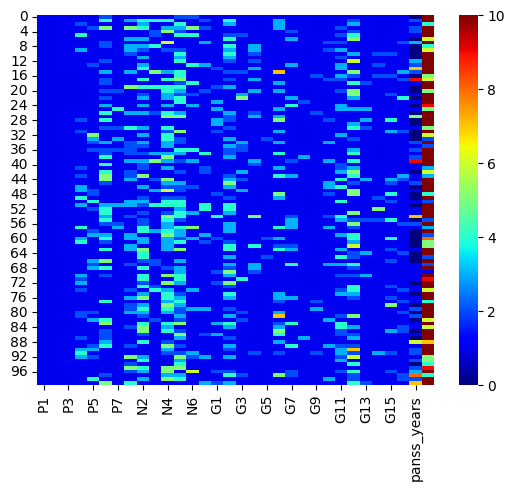

In [137]:
import seaborn as sns
sns.heatmap(sf.astype(float).fillna(0),cmap='jet',vmax=10)

In [140]:
deltadf=(sf1.astype(float).fillna(0)-sf.astype(float).fillna(0))

In [145]:
ddf=deltadf[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
       'G11', 'G12', 'G13', 'G14', 'G15', 'G16']]

<Axes: >

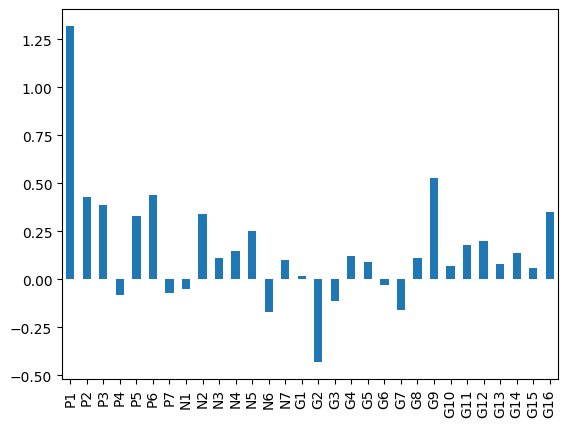

In [151]:
ddf.mean().plot(kind='bar')

In [106]:


model.predict_distributions(s)

[{'3': 0.07942168557460073,
  '7': 0.005774629791950641,
  '1': 0.5655837842070414,
  '5': 0.05211154857538606,
  '4': 0.10395930087143998,
  '6': 0.043530187188927545,
  '2': 0.14961886379065367},
 {'3': 0.06580385760427952,
  '7': 0.0006445039922064595,
  '1': 0.807055335625454,
  '5': 0.01480128206717219,
  '4': 0.02099595697687966,
  '6': 0.0028878736573866356,
  '2': 0.08781119007662161},
 {'3': 0.049825159734756874,
  '7': 0.0021339527710695473,
  '1': 0.8402240027007689,
  '5': 0.02146037177773132,
  '4': 0.028817473668461425,
  '6': 0.013676479332787298,
  '2': 0.043862560014424574},
 {'3': 0.10903936732090366,
  '7': 0.0004694259018510703,
  '1': 0.750383384755333,
  '5': 0.009081323781043218,
  '4': 0.03832753036978842,
  '6': 0.0002585490848019107,
  '2': 0.09244041878627864},
 {'3': 0.08600671104101638,
  '1': 0.7612860023199564,
  '5': 0.01103625938136936,
  '4': 0.026595335936270725,
  '6': 0.0006074333744387645,
  '2': 0.11446825794694837},
 {'3': 0.0832802612659289,
  '

In [108]:
model.predict_distributions(sq)[4]

{'3': 0.08608919457969143,
 '1': 0.762601190825365,
 '5': 0.009877104475860854,
 '4': 0.026225288907139082,
 '6': 0.0006086114858919457,
 '2': 0.1145986097260515}

In [109]:
sq

array(['1', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '2', '1',
       '3', '1', '3', '3', '1', '1', '1', '1', '1', '1', '1', '3', '6',
       '1', '1', '1', '1', '1', '2.0'], dtype='<U5')

In [156]:
qdistance(sq[10],s,model,model)

0.0459446341457366

In [158]:
H=qdistance_matrix(np.array(sq),np.array(sq),model,model)

symmetric case


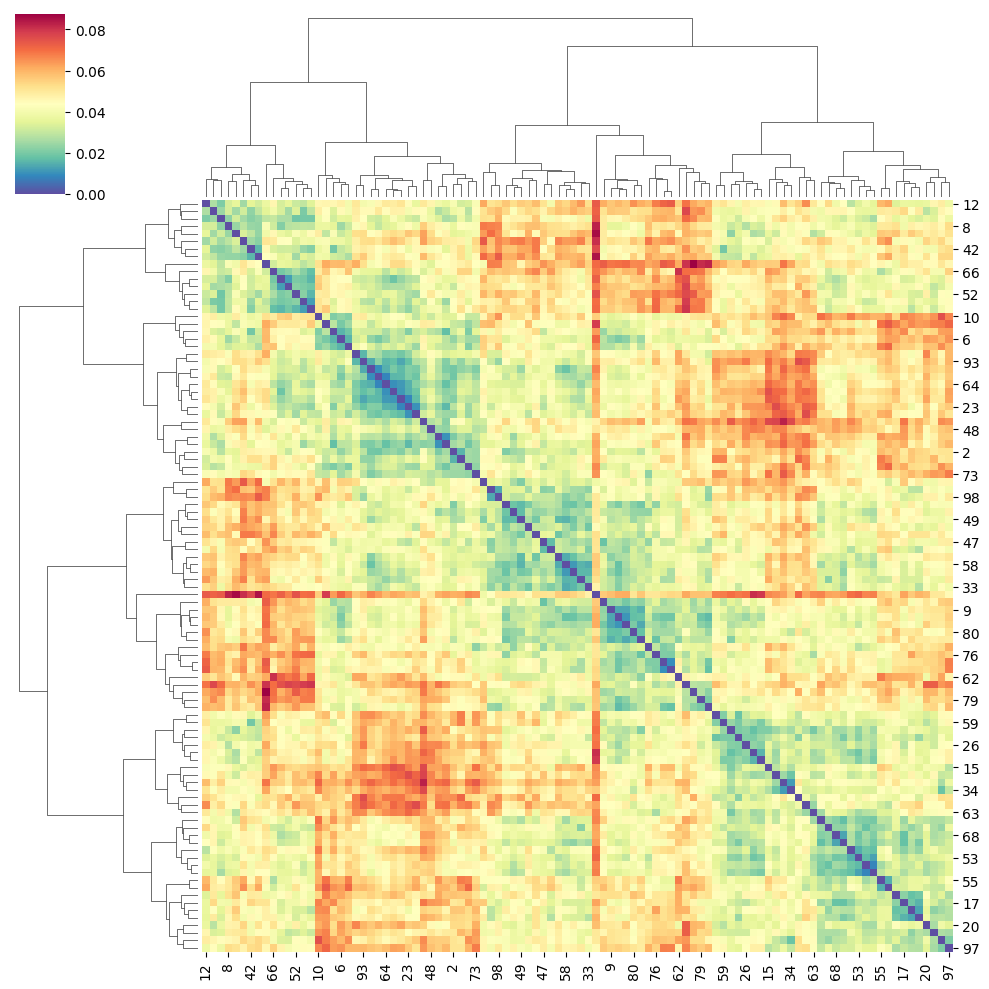

In [170]:
sns.clustermap(H,method='ward',cmap='Spectral_r')

In [162]:
H1=qdistance_matrix(np.array(sq1),np.array(sq1),model,model)

symmetric case


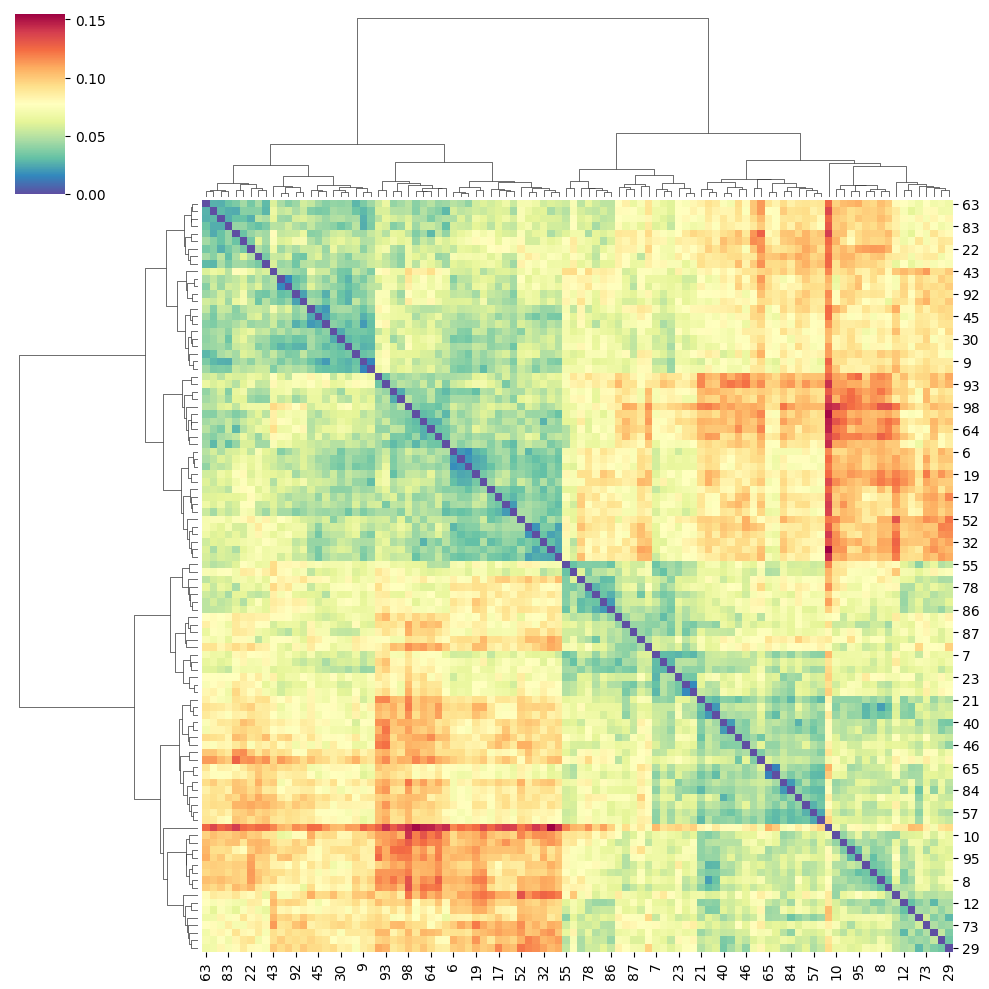

In [166]:
sns.clustermap(H1,method='ward',cmap='Spectral_r')

In [171]:
! ls -lhtr

total 3.6G
-rwxr-xr-x. 1 ishanu ishanu 2.3K Apr 25  2024  gp_uninstall.sh
-rwxr-xr-x. 1 ishanu ishanu 5.9K Apr 25  2024  gp_install.sh
-rw-r--r--. 1 ishanu ishanu  11M Apr 30  2024  GlobalProtect_UI_focal_deb-6.1.5.1-715.deb
-rw-r--r--. 1 ishanu ishanu 8.1M Apr 30  2024  GlobalProtect_deb-6.1.5.1-715.deb
-rw-r--r--. 1 ishanu ishanu  17M Apr 30  2024  GlobalProtect_focal_rpm-6.1.5.0-863.rpm
-rw-r--r--. 1 ishanu ishanu 8.7M Apr 30  2024  GlobalProtect_focal_deb-6.1.5.1-715.deb
-rw-r--r--. 1 ishanu ishanu 4.7M Apr 30  2024  GlobalProtect_focal_tar_arm-6.1.5.1-715.tgz
-rw-r--r--. 1 ishanu ishanu 4.6M Apr 30  2024  GlobalProtect_focal_rpm_arm-6.1.5.0-863.rpm
-rw-r--r--. 1 ishanu ishanu  16M Apr 30  2024  GlobalProtect_rpm-6.1.5.0-863.rpm
-rw-r--r--. 1 ishanu ishanu 9.0M Apr 30  2024  GlobalProtect_focal_tar-6.1.5.1-715.tgz
-rw-r--r--. 1 ishanu ishanu  13M Apr 30  2024  GlobalProtect_UI_tar-6.1.5.1-715.tgz
-rw-r--r--. 1 ishanu ishanu 9.3M Apr 30  2024  GlobalProtect_UI_deb-6.1.5.1-715.deb
-r